In [1]:
import MIMENet
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
#set path to simulation data
simulation_path = "/mnt/d/data/MIME_data/simData/dmMIME/seqLen100/experimentalConditions"

In [62]:
#set training parameters
training_path = simulation_path+'/data/trainingData.txt'
test_path = simulation_path+'/data/testData.txt'
epochs = 20
learning_rate = 0.0001
batch_size = 128
lambda_l1 = 0.0001
hidden_size_factor = 5
bottleneck = 1/5

In [63]:
model, train_history, test_history, mae_train_history, mae_test_history = MIMENet.train(training_path, test_path, epochs, learning_rate, batch_size, lambda_l1, hidden_size_factor, bottleneck)

Device: cuda:0
Epoch: 1/20


100%|██████████| 9481/9481 [00:59<00:00, 159.68it/s]


Epoch: 2/20


100%|██████████| 9481/9481 [00:59<00:00, 160.23it/s]


Epoch: 3/20


100%|██████████| 9481/9481 [00:58<00:00, 161.45it/s]


Epoch: 4/20


100%|██████████| 9481/9481 [00:58<00:00, 162.57it/s]


Epoch: 5/20


100%|██████████| 9481/9481 [00:58<00:00, 162.15it/s]


Epoch: 6/20


100%|██████████| 9481/9481 [00:58<00:00, 160.74it/s]


Epoch: 7/20


100%|██████████| 9481/9481 [00:57<00:00, 163.58it/s]


Epoch: 8/20


100%|██████████| 9481/9481 [00:58<00:00, 162.87it/s]


Epoch: 9/20


100%|██████████| 9481/9481 [00:59<00:00, 159.88it/s]


Epoch: 10/20


100%|██████████| 9481/9481 [00:57<00:00, 164.48it/s]


Epoch: 11/20


100%|██████████| 9481/9481 [00:59<00:00, 159.30it/s]


Epoch: 12/20


100%|██████████| 9481/9481 [00:59<00:00, 160.31it/s]


Epoch: 13/20


100%|██████████| 9481/9481 [00:58<00:00, 162.45it/s]


Epoch: 14/20


100%|██████████| 9481/9481 [00:58<00:00, 161.17it/s]


Epoch: 15/20


100%|██████████| 9481/9481 [00:59<00:00, 160.33it/s]


Epoch: 16/20


100%|██████████| 9481/9481 [00:58<00:00, 161.72it/s]


Epoch: 17/20


100%|██████████| 9481/9481 [00:59<00:00, 160.41it/s]


Epoch: 18/20


100%|██████████| 9481/9481 [00:58<00:00, 160.83it/s]


Epoch: 19/20


100%|██████████| 9481/9481 [00:58<00:00, 162.16it/s]


Epoch: 20/20


100%|██████████| 9481/9481 [00:58<00:00, 161.87it/s]


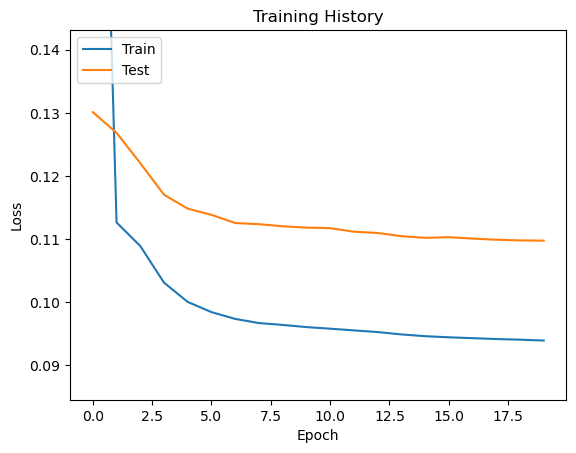

In [64]:
#plot training history
plt.plot(train_history)
plt.plot(test_history)
plt.title("Training History")
plt.ylabel("Loss")
plt.xlabel("Epoch")
#scale y axis to ignore training loss of first epoch
plt.ylim(min(min(train_history),min(test_history))*0.9, max(test_history)*1.1)
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

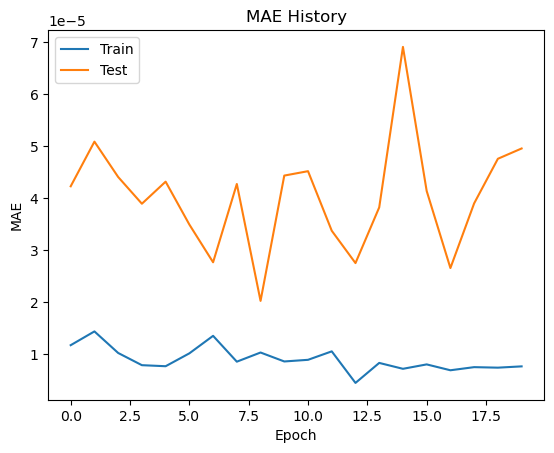

In [65]:
#plot mae history
plt.plot(mae_train_history)
plt.plot(mae_test_history)
plt.title("MAE History")
plt.ylabel("MAE")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

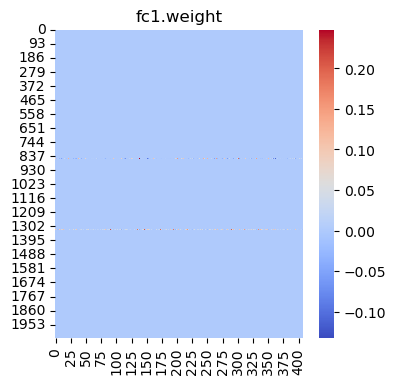

max weight value:  0.24769336
min weight value:  -0.13211946
number of pruned weights:  460706
number of non zero weights:  371614


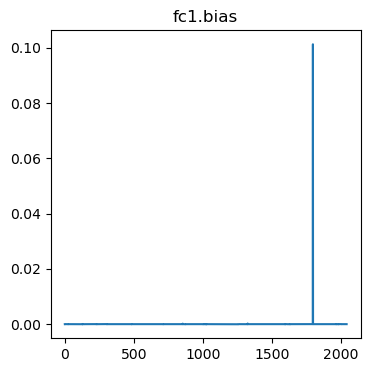

max bias value:  0.10127778
min bias value:  -4.5145538e-05
number of pruned biases:  1119
number of non zero biases:  921


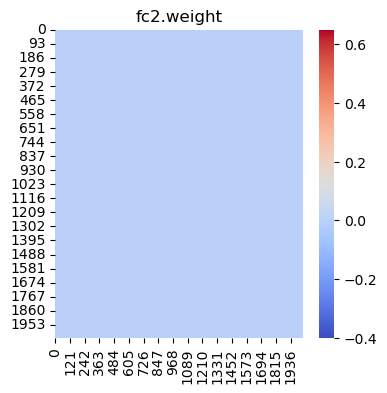

max weight value:  0.6499683
min weight value:  -0.4003977
number of pruned weights:  2432308
number of non zero weights:  1729292


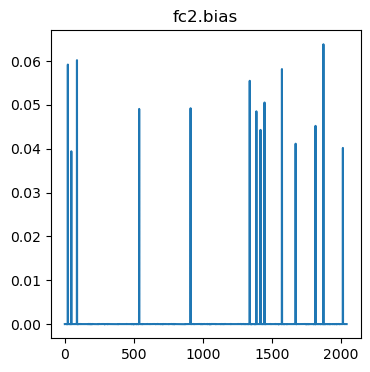

max bias value:  0.063837394
min bias value:  -4.6068057e-05
number of pruned biases:  1149
number of non zero biases:  891


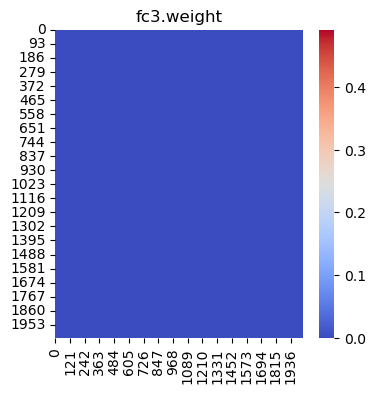

max weight value:  0.4909365
min weight value:  -4.5860987e-05
number of pruned weights:  2493315
number of non zero weights:  1668285


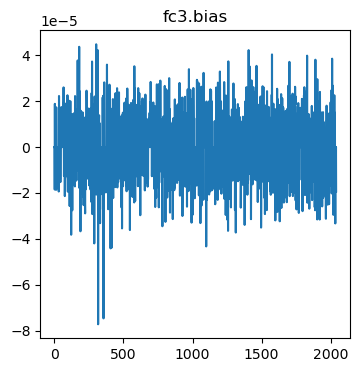

max bias value:  4.47999e-05
min bias value:  -7.7246914e-05
number of pruned biases:  1146
number of non zero biases:  894


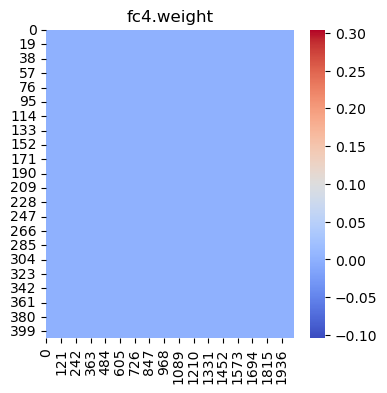

max weight value:  0.30396122
min weight value:  -0.10366493
number of pruned weights:  501247
number of non zero weights:  331073


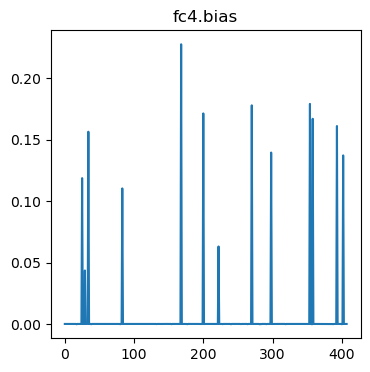

max bias value:  0.22765382
min bias value:  -0.00026777494
number of pruned biases:  219
number of non zero biases:  189


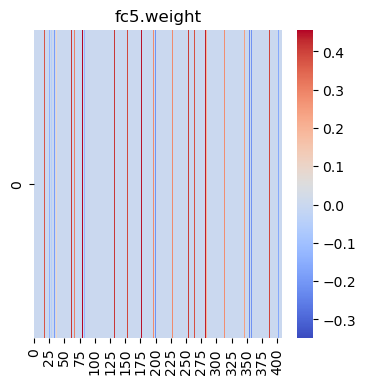

max weight value:  0.4567411
min weight value:  -0.3477162
number of pruned weights:  206
number of non zero weights:  202


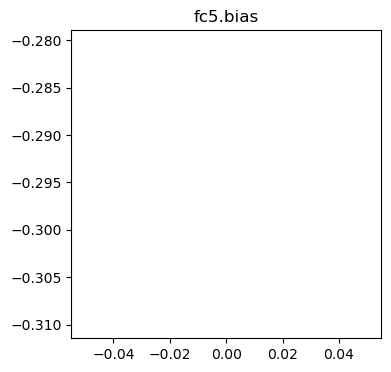

max bias value:  -0.2951928
min bias value:  -0.2951928
number of pruned biases:  0
number of non zero biases:  1


In [66]:
for name, param in model.named_parameters():
    #if weight is not a bias
    if 'bias' not in name:
        #reshape weights to 2d array
        weight = param.data.cpu().numpy().reshape(param.data.cpu().numpy().shape[0], param.data.cpu().numpy().shape[1])
        #plot heatmap of weights
        plt.figure(figsize=(4,4))
        sns.heatmap(weight, cmap='coolwarm')
        plt.title(name)
        plt.show()

        print('max weight value: ', np.max(weight))
        print('min weight value: ', np.min(weight))
        #print('number of weights: ', weight.size)
        print('number of pruned weights: ', np.sum(weight == 0))
        print('number of non zero weights: ', np.sum(weight != 0))

    else:
        bias = param.data.cpu().numpy()
        #plot histogram of biases
        plt.figure(figsize=(4,4))
        sns.lineplot(bias.flatten())
        plt.title(name)
        plt.show()
 
        print('max bias value: ', np.max(bias))
        print('min bias value: ', np.min(bias))
        #print('number of biases: ', bias.size)
        print('number of pruned biases: ', np.sum(bias == 0))
        print('number of non zero biases: ', np.sum(bias != 0))

In [67]:
# read in kd values
kds = np.loadtxt(simulation_path+'/secondFromProt1/prot1/single_kds.txt')

#insert 1 at position 0 and then every 3rd position
kds = np.insert(kds, 0, 1)
kds = np.insert(kds, np.arange(4, len(kds), 3), 1)
kds[0:10]

array([1.      , 0.212905, 0.362492, 1.      , 1.      , 0.393369,
       3.48016 , 1.      , 1.      , 1.      ])

In [68]:
predictions = []
prediction_example = np.zeros(len(kds)+8)
for i in range(8, len(kds)+8):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    current_prediction_example = prediction_example.copy()
    current_prediction_example[i] = 1
    current_prediction_example = torch.from_numpy(current_prediction_example).float()
    current_prediction_example = current_prediction_example.to(device)
    #output binding probability and append list for given protein concentration combination
    with torch.no_grad():
        output = model(current_prediction_example)
        predictions.append(output.item())

predictions[0:10]

[0.6649388670921326,
 0.8127581477165222,
 0.8297740817070007,
 0.715377688407898,
 0.6648807525634766,
 0.8696017265319824,
 0.48393720388412476,
 0.6289916038513184,
 0.664936363697052,
 0.6778444647789001]

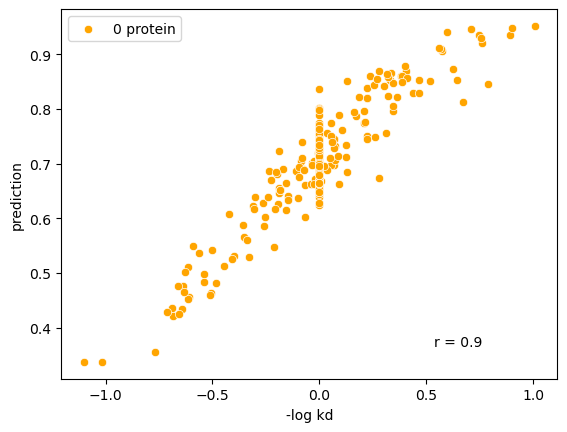

In [69]:
#two plots -log kd vs predictionZeroConc and predictionOneConc
sns.scatterplot(x=-np.log10(kds), y=predictions, label='0 protein', color='orange')
plt.xlabel('-log kd')
plt.ylabel('prediction')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(-np.log10(kds), predictions)[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()